# A*搜索算法实验：城市间最优路径搜索

## Cell 1: 导入库

In [64]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches
# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

## Cell 2: 数据结构定义

In [65]:
# 定义城市间的交通网络图（邻接表）
# {城市: [(邻居城市, 距离), ...]}
graph = {
    'A': [('B', 5), ('D', 3), ('E', 6)],
    'B': [('A', 5), ('C', 5)],
    'C': [('B', 5)],
    'D': [('A', 3), ('F', 4)],
    'E': [('I', 7), ('G', 3), ('H', 4), ('A', 6)],
    'F': [('D', 4), ('G', 4)],
    'G': [('E', 3), ('F', 4), ('K', 5),('H',3)],
    'H': [('E', 4), ('J', 7), ('G', 3)],
    'I': [('E', 7), ('J', 5)],
    'J': [('H', 7), ('I', 5), ('K', 3)],
    'K': [('G', 5), ('L', 6), ('J', 3)],
    'L': [('K', 6)]
}
# 定义启发函数：每个城市到目标城市K的直线距
heuristic = {
    'A': 13, 'B': 10, 'C': 6, 'D': 12, 'E': 7, 'F': 8, 
    'G': 5, 'H': 3, 'I': 6, 'J': 3, 'K': 0, 'L': 6
}

## Cell 3: A*算法实现

In [ ]:
def astar_search(graph, start, goal, heuristic):
    """
    A*搜索算法实现
    
    算法原理：
    - f(n) = g(n) + h(n)
    - g(n): 从起点到当前节点n的实际代价
    - h(n): 从节点n到目标的启发式估计代价
    - f(n): 总评估函数，用于选择下一个扩展的节点
    
    参数:
        graph: 图的邻接表表示
        start: 起始节点
        goal: 目标节点  
        heuristic: 启发函数字典
    
    返回:
        (path, cost, search_info): 最优路径、总代价、搜索过程信息
    """
    
    # 优先队列，存储 (f_score, g_score, node, path)，f_score作为优先级，越小优先级越高
    open_set = [(heuristic[start], 0, start, [start])]
    # 记录已经处理过的节点，避免重复处理
    closed_set = set()
    # 记录搜索过程信息
    search_info = {
        'expanded_nodes': [],  # 扩展过的节点顺序
        'node_costs': {},      # 每个节点的最优g值
        'search_tree': []      # 搜索树的边
    }
    # 记录每个节点的最佳g值（从起点到该点的最短距离）
    g_scores = {start: 0}
    step = 0
    print("A*搜索开始:")
    
    while open_set:
        step += 1
        # 从优先队列中取出f值最小的节点
        current_f, current_g, current_node, current_path = heapq.heappop(open_set)
        print(f"步骤 {step}: 扩展节点 {current_node}")
        print(f"  当前路径: {' -> '.join(current_path)}")
        print(f"  g({current_node}) = {current_g}, h({current_node}) = {heuristic[current_node]}, f({current_node}) = {current_f}")
        # 如果当前节点已经被处理过则跳过
        if current_node in closed_set:
            print(f"  节点 {current_node} 已处理过，跳过")
            continue
        # 将当前节点加入关闭集合
        closed_set.add(current_node)
        search_info['expanded_nodes'].append(current_node)
        search_info['node_costs'][current_node] = current_g
        # 检查是否到达目标
        if current_node == goal:
            print(f"\n 最优路径: {' -> '.join(current_path)}")
            print(f"总代价: {current_g}")
            return current_path, current_g, search_info
        # 扩展当前节点的所有邻居
        neighbors_info = []
        for neighbor, edge_cost in graph.get(current_node, []):
            if neighbor in closed_set:
                continue  # 跳过已处理的邻居
            # 计算到邻居节点的新g值
            tentative_g = current_g + edge_cost
            # 计算f值 = g值 + 启发值
            f_score = tentative_g + heuristic[neighbor]
            # 如果找到更好的路径，或者是第一次访问该邻居
            if neighbor not in g_scores or tentative_g < g_scores[neighbor]:
                g_scores[neighbor] = tentative_g
                new_path = current_path + [neighbor]
                heapq.heappush(open_set, (f_score, tentative_g, neighbor, new_path))
                # 记录搜索树的边
                search_info['search_tree'].append((current_node, neighbor, edge_cost))  
            neighbors_info.append((neighbor, tentative_g, heuristic[neighbor], f_score))
    
        if neighbors_info:
            print("  扩展的邻居:")
            for neighbor, g, h, f in neighbors_info:
                status = "新增" if neighbor not in closed_set else "已处理"
                print(f"    {neighbor}: g={g}, h={h}, f={f} ({status})")
        print()
    return None, float('inf'), search_info

start_city = 'A'
goal_city = 'K'
optimal_path, total_cost, search_info = astar_search(graph, start_city, goal_city, heuristic)

A*搜索开始:
步骤 1: 扩展节点 A
  当前路径: A
  g(A) = 0, h(A) = 13, f(A) = 13
  扩展的邻居:
    B: g=5, h=10, f=15 (新增)
    D: g=3, h=12, f=15 (新增)
    E: g=6, h=7, f=13 (新增)

步骤 2: 扩展节点 E
  当前路径: A -> E
  g(E) = 6, h(E) = 7, f(E) = 13
  扩展的邻居:
    I: g=13, h=6, f=19 (新增)
    G: g=9, h=5, f=14 (新增)
    H: g=10, h=3, f=13 (新增)

步骤 3: 扩展节点 H
  当前路径: A -> E -> H
  g(H) = 10, h(H) = 3, f(H) = 13
  扩展的邻居:
    J: g=17, h=3, f=20 (新增)
    G: g=13, h=5, f=18 (新增)

步骤 4: 扩展节点 G
  当前路径: A -> E -> G
  g(G) = 9, h(G) = 5, f(G) = 14
  扩展的邻居:
    F: g=13, h=8, f=21 (新增)
    K: g=14, h=0, f=14 (新增)

步骤 5: 扩展节点 K
  当前路径: A -> E -> G -> K
  g(K) = 14, h(K) = 0, f(K) = 14

 最优路径: A -> E -> G -> K
总代价: 14


## Cell 4: 辅助可视化函数

初始交通网络图：


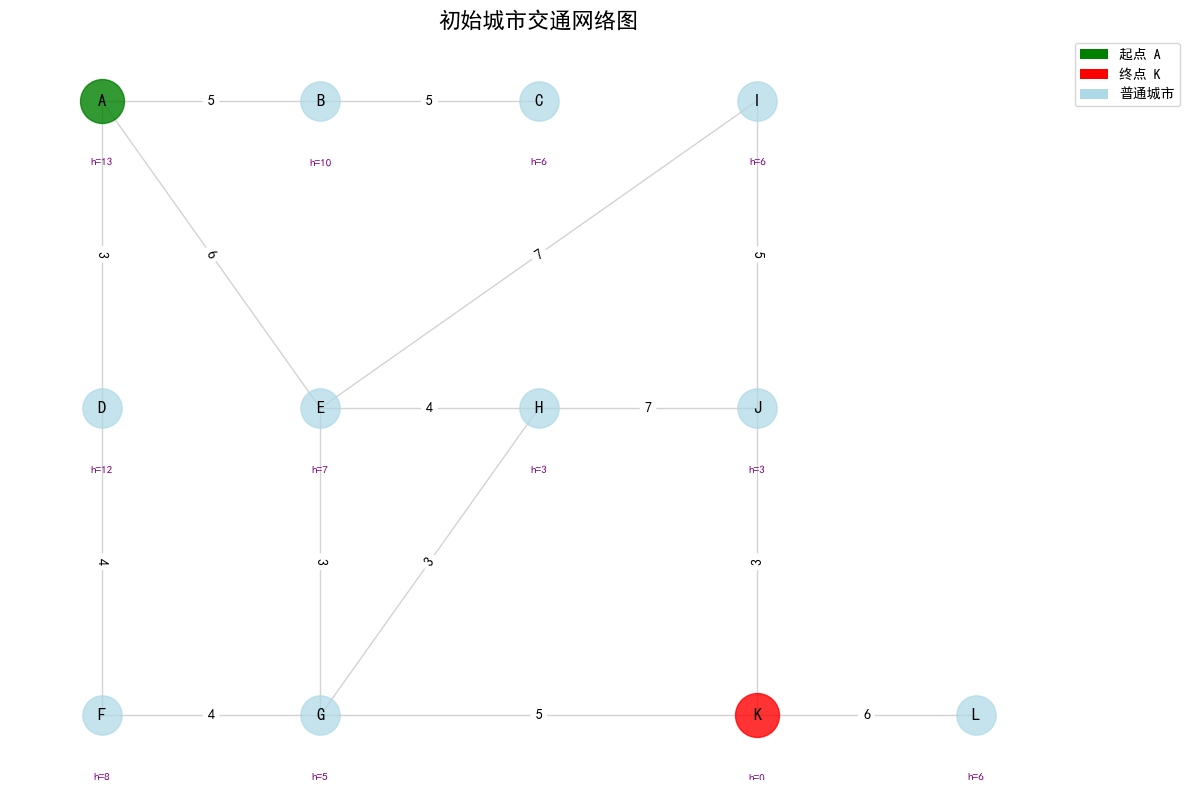

最优路径:


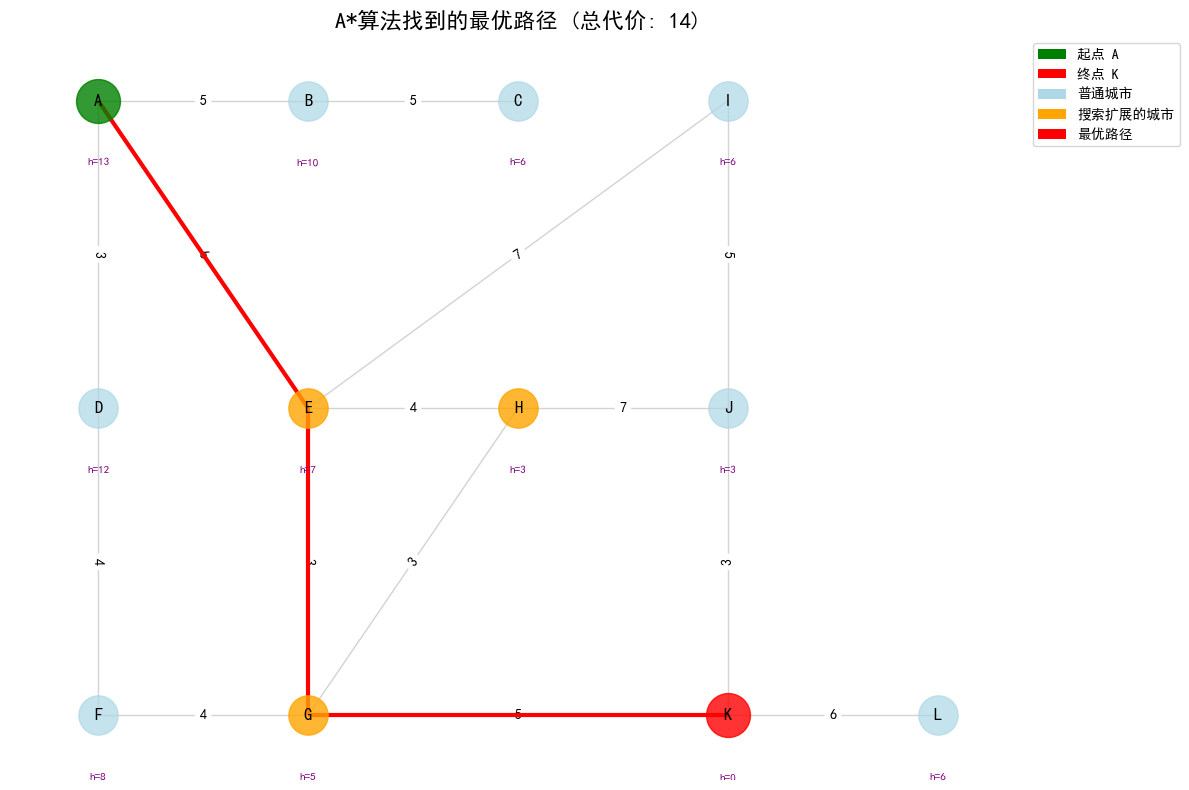

In [67]:
def create_graph_layout():

    pos = {
        'A': (0, 2),    'B': (2, 2),    'C': (4, 2),
        'D': (0, 1),    'E': (2, 1),    'F': (0, 0),
        'G': (2, 0),    'H': (4, 1),    'I': (6, 2),
        'J': (6, 1),    'K': (6, 0),   'L': (8, 0)
    }
    return pos

def visualize_graph(graph, path=None, expanded_nodes=None, title="城市交通网络图"):

    plt.figure(figsize=(12, 8))
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight)
    pos = create_graph_layout()
    edge_list = [(u, v) for u, v, d in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, edgelist=edge_list, edge_color='lightgray', width=1)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=10)
    normal_nodes = [n for n in G.nodes() if n not in (['A', 'K'] + (expanded_nodes or []))]
    nx.draw_networkx_nodes(G, pos, nodelist=normal_nodes, node_color='lightblue', 
                          node_size=800, alpha=0.7)
    nx.draw_networkx_nodes(G, pos, nodelist=['A'], node_color='green', 
                          node_size=1000, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=['K'], node_color='red', 
                          node_size=1000, alpha=0.8)
    if expanded_nodes:
        expanded_except_start_goal = [n for n in expanded_nodes if n not in ['A', 'K']]
        if expanded_except_start_goal:
            nx.draw_networkx_nodes(G, pos, nodelist=expanded_except_start_goal, 
                                  node_color='orange', node_size=800, alpha=0.8)
    if path:
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)
    
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    heuristic_labels = {node: f'h={heuristic[node]}' for node in G.nodes()}
    label_pos = {node: (x, y-0.2) for node, (x, y) in pos.items()}
    nx.draw_networkx_labels(G, label_pos, heuristic_labels, font_size=8, font_color='purple')
    plt.title(title, fontsize=16, fontweight='bold')
    legend_elements = [
        mpatches.Circle((0, 0), 1, facecolor='green', label='起点 A'),
        mpatches.Circle((0, 0), 1, facecolor='red', label='终点 K'),
        mpatches.Circle((0, 0), 1, facecolor='lightblue', label='普通城市'),
    ]
    
    if expanded_nodes:
        legend_elements.append(mpatches.Circle((0, 0), 1, facecolor='orange', label='搜索扩展的城市'))
    if path:
        legend_elements.append(mpatches.Rectangle((0, 0), 1, 1, facecolor='red', label='最优路径'))
    
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

print("初始交通网络图：")
visualize_graph(graph, title="初始城市交通网络图")

print("最优路径:")
if optimal_path:
    visualize_graph(graph, path=optimal_path, expanded_nodes=search_info['expanded_nodes'], 
                   title=f"A*算法找到的最优路径 (总代价: {total_cost})")
else:
    print("无法绘制路径图，因为未找到有效路径。")
